# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 预处理

In [1]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [64]:
output_path = 'D:/python/lda/result'
file_path = 'D:/python/lda/data'
os.chdir(file_path)
data=pd.read_excel("data.xlsx")#content type
os.chdir(output_path)
dic_file = "D:/python/lda/stop_dic/dict.txt"
stop_file = "D:/python/lda/stop_dic/stopwords.txt"

In [3]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

In [4]:
data["content_cutted"] = data.content.apply(chinese_word_cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17888\AppData\Local\Temp\jieba.cache
Loading model cost 1.157 seconds.
Prefix dict has been built successfully.


## LDA分析

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

In [7]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content_cutted)

In [79]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=8,
                          random_state=0)

### 输出每个主题对应词语 

In [81]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
电影 票房 影片 观众 作品 故事 电影节 市场 娱乐 主演 合作 公司 内地 香港电影 新片 角色 制作 方面 媒体 本片 太空 剧本 成绩 人生 奖项
Topic #1:
主队 赔率 主场 联赛 公司 足彩 客场 客胜 比赛 本场 客队 平局 博彩 指数 调整 优势 意甲 半球 赢球 实力 一球 交锋 情况 冷门 历史
Topic #2:
主持人 工作 时间 研究 演员 生活 新浪 朋友 过程 人们 感觉 记者 科学家 人类 问题 现场 孩子 地方 事情 世界 经历 历史 老师 人员 网友
Topic #3:
专家 网友 老师 压力 走势 分析 突破 黄金 股票 问题 大盘 建议 成本 新浪 整理 调整 机会 坐堂 趋势 股市 后市 行情 市场 价位 公司
Topic #4:
比赛 球队 火箭 球员 数据 时间 篮板 奇才 问题 新浪 体育讯 助攻 机会 主场 状态 湖人 训练 内线 情况 球迷 火箭队 能力 客场 投篮 命中率
Topic #5:
项目 建筑 发展 生活 地产 空间 市场 区域 新浪 户型 活动 产品 设计 房子 别墅 国际 主持人 文化 客户 集团 论坛 艺术 开发商 功能 住宅
Topic #6:
游戏 比赛 电子竞技 玩家 网站 手机 总决赛 项目 冠军 战队 赛事 赛区 互联网 奖金 网络 世界 用户 全国 星际争霸 公司 视频 网吧 现场 决赛 时间
Topic #7:
学生 经济 投资 问题 市场 公司 大学 政府 学校 计划 政策 企业 国家 情况 专业 教育 银行 影响 发展 能力 资金 机构 国际 基金 方面


### 输出每篇文章对应主题 

In [82]:
import numpy as np

In [83]:
topics=lda.transform(tf)

In [84]:
topic = []
for t in topics:
    topic.append(list(t).index(np.max(t)))
data['topic']=topic
data.to_excel("data_topic.xlsx",index=False)

In [86]:
topics[0]#0 1 2 

array([0.00277842, 0.00277847, 0.00278347, 0.00277921, 0.94701711,
       0.00278748, 0.0362966 , 0.00277924])

## 可视化 

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

In [97]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.show(pic)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [16/Oct/2021 23:36:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2021 23:36:00] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2021 23:36:01] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2021 23:36:01] "GET /LDAvis.js HTTP/1.1" 200 -



stopping Server...


## 困惑度 

In [ ]:
import matplotlib.pyplot as plt

In [27]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


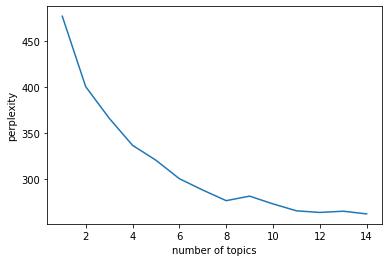

In [58]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

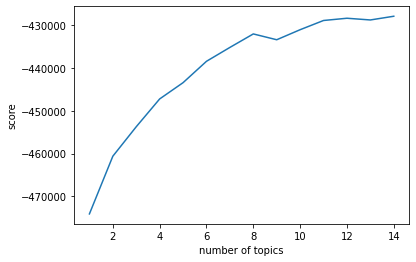

In [61]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,scores[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()